In [ ]:
# Imports
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzes as anz
from src import mitigation as mit

In [ ]:
with open("data/H2O_hamiltonian.pkl", "rb") as f:
    hamiltonian = pickle.load(f)

In [2]:
# Hamiltonians
with open(f"data/H2_hamiltonian.pkl", "rb") as f:
    hamiltonian = pickle.load(f)

In [3]:
num_qubits = hamiltonian.num_qubits
res_normal = {"times":[], "iters": [], "energies": []}
res_all_layers = {"times":[], "iters": [], "energies": []}
res_all_layers_rev = {"times":[], "iters": [], "energies": []}
res_some_layers = {"times":[], "iters": [], "energies": []}
res_some_layers_rev = {"times":[], "iters": [], "energies": []}
res_adding_layers = {"times":[], "iters": [], "energies": []}
res_adding_layers_rev = {"times":[], "iters": [], "energies": []}
for num_layers in range(1,11):
    ansatz, n_params = anz.build_Nlocal_ansatz(num_qubits, num_layers)
    t0 = time.time()
    optimization_normal=mit.VQE_minimization(ansatz, hamiltonian)
    t1 = time.time()
    res_normal["times"].append(t1-t0)
    res_normal["iters"].append(optimization_normal["iters"])
    res_normal["energies"].append(optimization_normal["cost_history"][-1])
    t0 = time.time()
    optimization_all_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, num_layers)
    t1 = time.time()
    res_all_layers["times"].append(t1-t0)
    res_all_layers["iters"].append(optimization_all_layers["iters"])
    res_all_layers["energies"].append(optimization_all_layers["cost_history"][-1])
    t0 = time.time()
    optimization_all_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, num_layers, "backward")
    t1 = time.time()
    res_all_layers_rev["times"].append(t1-t0)
    res_all_layers_rev["iters"].append(optimization_all_layers_rev["iters"])
    res_all_layers_rev["energies"].append(optimization_all_layers_rev["cost_history"][-1])
    t0 = time.time()
    optimization_some_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1)
    t1 = time.time()
    res_some_layers["times"].append(t1-t0)
    res_some_layers["iters"].append(optimization_some_layers["iters"])
    res_some_layers["energies"].append(optimization_some_layers["cost_history"][-1])
    t0 = time.time()
    optimization_some_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1, "backward")
    t1 = time.time()
    res_some_layers_rev["times"].append(t1-t0)
    res_some_layers_rev["iters"].append(optimization_some_layers_rev["iters"])
    res_some_layers_rev["energies"].append(optimization_some_layers_rev["cost_history"][-1])
    t0 = time.time()
    optimization_adding_layers=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian, num_qubits, num_layers)
    t1 = time.time()
    res_adding_layers["times"].append(t1-t0)
    res_adding_layers["iters"].append(optimization_adding_layers["iters"])
    res_adding_layers["energies"].append(optimization_adding_layers["cost_history"][-1])
    t0 = time.time()
    optimization_adding_layers_rev=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian, num_qubits, num_layers, direction= "backward")
    t1 = time.time()
    res_adding_layers_rev["times"].append(t1-t0)
    res_adding_layers_rev["iters"].append(optimization_adding_layers_rev["iters"])
    res_adding_layers_rev["energies"].append(optimization_adding_layers_rev["cost_history"][-1])

In [5]:
with open("data/layer/H2_res_normal.pkl", "wb") as f:
    pickle.dump(res_normal, f)
with open("data/layer/H2_res_all_layers.pkl", "wb") as f:
    pickle.dump(res_all_layers, f)
with open("data/layer/H2_res_all_layers_rev.pkl", "wb") as f:
    pickle.dump(res_all_layers_rev, f)
with open("data/layer/H2_res_some_layers.pkl", "wb") as f:
    pickle.dump(res_some_layers, f)
with open("data/layer/H2_res_some_layers_rev.pkl", "wb") as f:
    pickle.dump(res_some_layers_rev, f)
with open("data/layer/H2_res_adding_layers.pkl", "wb") as f:
    pickle.dump(res_adding_layers, f)
with open("data/layer/H2_res_adding_layers_rev.pkl", "wb") as f:
    pickle.dump(res_adding_layers_rev, f)

In [2]:
with open("data/layer/H2_res_normal.pkl", "rb") as f:
    res_normal = pickle.load(f)
with open("data/layer/H2_res_all_layers.pkl", "rb") as f:
    res_all_layers = pickle.load(f)
with open("data/layer/H2_res_all_layers_rev.pkl", "rb") as f:
    res_all_layers_rev = pickle.load(f)
with open("data/layer/H2_res_some_layers.pkl", "rb") as f:
    res_some_layers = pickle.load(f)
with open("data/layer/H2_res_some_layers_rev.pkl", "rb") as f:
    res_some_layers_rev = pickle.load(f)
with open("data/layer/H2_res_adding_layers.pkl", "rb") as f:
    res_adding_layers = pickle.load(f)
with open("data/layer/H2_res_adding_layers_rev.pkl", "rb") as f:
    res_adding_layers_rev = pickle.load(f)

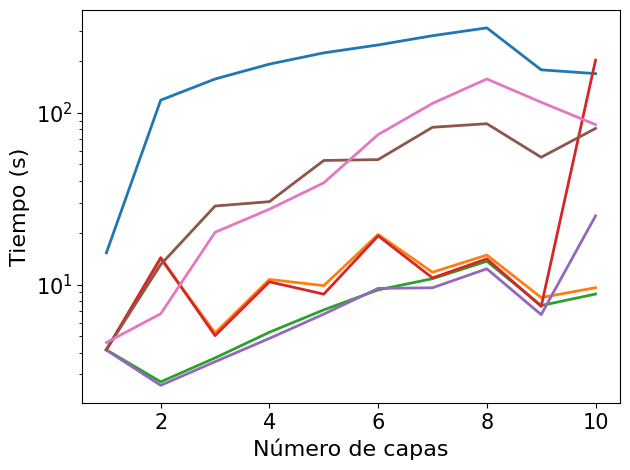

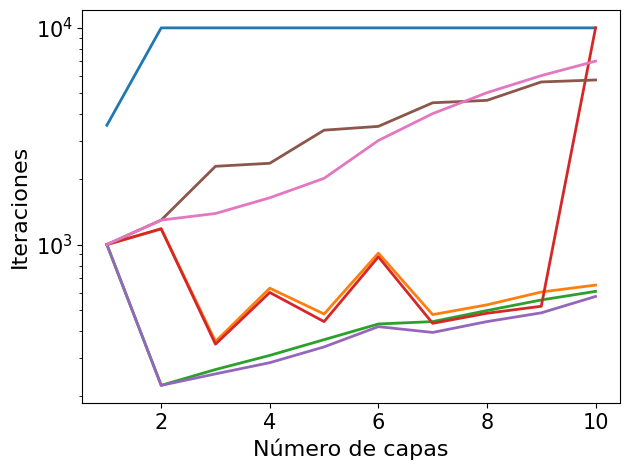

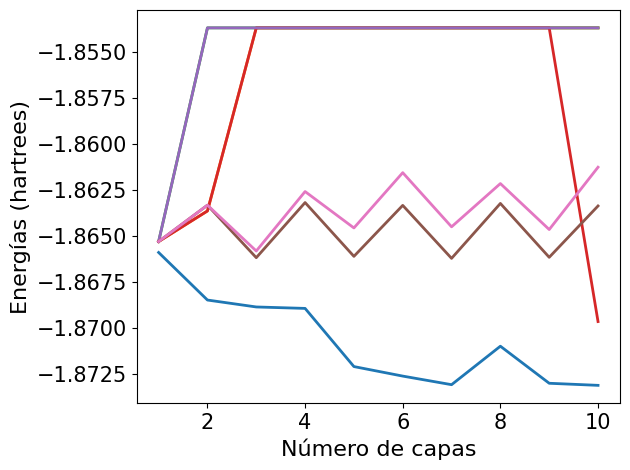

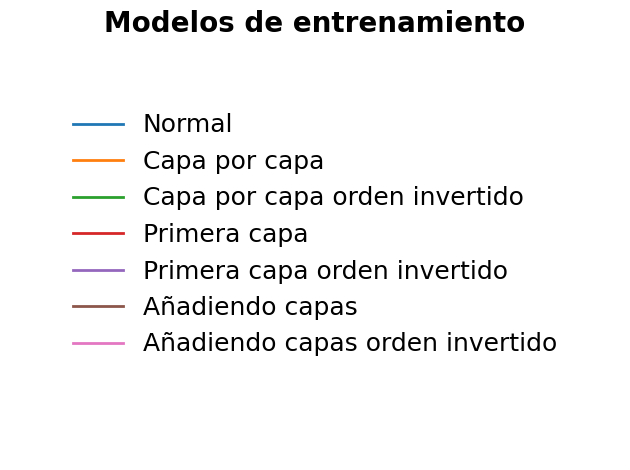

In [18]:
# Create lists for the lines and labels
lines = []
labels = []

# Time figure
plt.figure()
l1, = plt.plot(range(1,11), res_normal["times"], label='Normal', linewidth=2)
l2, = plt.plot(range(1,11), res_all_layers["times"], label='Capa por capa', linewidth=2)
l3, = plt.plot(range(1,11), res_all_layers_rev["times"], label='Capa por capa orden invertido', linewidth=2)
l4, = plt.plot(range(1,11), res_some_layers["times"], label='Primera capa', linewidth=2)
l5, = plt.plot(range(1,11), res_some_layers_rev["times"], label='Primera capa orden invertido', linewidth=2)
l6, = plt.plot(range(1,11), res_adding_layers["times"], label='Añadiendo capas', linewidth=2)
l7, = plt.plot(range(1,11), res_adding_layers_rev["times"], label='Añadiendo capas orden invertido', linewidth=2)
plt.yscale("log")  
plt.xlabel('Número de capas', size=16)
plt.ylabel('Tiempo (s)', size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.tight_layout()
# Save the lines and labels
lines.extend([l1, l2, l3, l4, l5, l6, l7])
labels.extend([line.get_label() for line in lines])

# Iterations figure
plt.figure()
plt.plot(range(1,11), res_normal["iters"], linewidth=2)
plt.plot(range(1,11), res_all_layers["iters"], linewidth=2)
plt.plot(range(1,11), res_all_layers_rev["iters"], linewidth=2)
plt.plot(range(1,11), res_some_layers["iters"], linewidth=2)
plt.plot(range(1,11), res_some_layers_rev["iters"], linewidth=2)
plt.plot(range(1,11), res_adding_layers["iters"], linewidth=2)
plt.plot(range(1,11), res_adding_layers_rev["iters"], linewidth=2)
plt.yscale("log") 
plt.xlabel('Número de capas', size=16)
plt.ylabel('Iteraciones', size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.tight_layout()

# Energy figure
plt.figure()
plt.plot(range(1,11), res_normal["energies"], linewidth=2)
plt.plot(range(1,11), res_all_layers["energies"], linewidth=2)
plt.plot(range(1,11), res_all_layers_rev["energies"], linewidth=2)
plt.plot(range(1,11), res_some_layers["energies"], linewidth=2)
plt.plot(range(1,11), res_some_layers_rev["energies"], linewidth=2)
plt.plot(range(1,11), res_adding_layers["energies"], linewidth=2)
plt.plot(range(1,11), res_adding_layers_rev["energies"], linewidth=2)
plt.xlabel('Número de capas', size=16)
plt.ylabel('Energías (hartrees)', size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.tight_layout()

# Figura separada solo para la leyenda
fig_legend = plt.figure()
fig_legend.legend(lines, labels, loc='center', ncol=1, frameon=False, prop={'size': 18})
plt.title("Modelos de entrenamiento", fontsize=20, fontweight="bold")
plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
res_normal = []
res_all_layers = []
res_all_layers_rev = []
res_some_layers = []
res_some_layers_rev = []
res_adding_layers = []
res_adding_layers_rev = []
for num_qubits in range(hamiltonian.num_qubits, 11):
    hamiltonian_exp=cf.expand_observable(hamiltonian, num_qubits)
    res_normal.append({"times":[], "iters": [], "energies": []})
    res_all_layers.append({"times":[], "iters": [], "energies": []})
    res_all_layers_rev.append({"times":[], "iters": [], "energies": []})
    res_some_layers.append({"times":[], "iters": [], "energies": []})
    res_some_layers_rev.append({"times":[], "iters": [], "energies": []})
    res_adding_layers.append({"times":[], "iters": [], "energies": []})
    res_adding_layers_rev.append({"times":[], "iters": [], "energies": []})
    for num_layers in range(1,11):
        ansatz, n_params = anz.build_Nlocal_ansatz(num_qubits, num_layers)

        t0 = time.time()
        optimization_normal=mit.VQE_minimization(ansatz, hamiltonian_exp)
        t1 = time.time()
        res_normal[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_normal[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_normal["iters"])
        res_normal[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_normal["cost_history"][-1])

        t0=time.time()
        optimization_all_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian_exp, num_layers, num_layers)
        t1 = time.time()
        res_all_layers[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_all_layers[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_all_layers["iters"])
        res_all_layers[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_all_layers["cost_history"][-1])

        t0=time.time()
        optimization_all_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian_exp, num_layers, num_layers, "backward")
        t1 = time.time()
        res_all_layers_rev[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_all_layers_rev[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_all_layers_rev["iters"])
        res_all_layers_rev[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_all_layers_rev["cost_history"][-1])

        t0 = time.time()
        optimization_some_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian_exp, num_layers, 1)
        t1 = time.time()
        res_some_layers[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_some_layers[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_some_layers["iters"])
        res_some_layers[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_some_layers["cost_history"][-1])

        t0 = time.time()
        optimization_some_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian_exp, num_layers, 1, "backward")
        t1 = time.time()
        res_some_layers_rev[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_some_layers_rev[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_some_layers_rev["iters"])
        res_some_layers_rev[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_some_layers_rev["cost_history"][-1])

        t0 = time.time()
        optimization_adding_layers=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian_exp, num_qubits, num_layers)
        t1 = time.time()
        res_adding_layers[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_adding_layers[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_adding_layers["iters"])
        res_adding_layers[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_adding_layers["cost_history"][-1])

        t0 = time.time()
        optimization_adding_layers_rev=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian_exp, num_qubits, num_layers, direction= "backward")
        t1 = time.time()
        res_adding_layers_rev[num_qubits-hamiltonian.num_qubits]["times"].append(t1-t0)
        res_adding_layers_rev[num_qubits-hamiltonian.num_qubits]["iters"].append(optimization_adding_layers_rev["iters"])
        res_adding_layers_rev[num_qubits-hamiltonian.num_qubits]["energies"].append(optimization_adding_layers_rev["cost_history"][-1])
res_var_qubit_layer=[res_all_layers, res_all_layers_rev, res_some_layers, res_some_layers_rev, res_adding_layers, res_adding_layers_rev]

In [ ]:
with open("data/layer/res_var_qubit_layer_normal_10000.pkl", "wb") as f:
    pickle.dump(res_normal, f)
with open("data/layer/res_var_qubit_layer_10000.pkl", "wb") as f:
    pickle.dump(res_var_qubit_layer, f)

In [ ]:
with open("data/layer/res_var_qubit_layer_normal.pkl", "wb") as f:
    pickle.dump(res_normal, f)
with open("data/layer/res_var_qubit_layer.pkl", "wb") as f:
    pickle.dump(res_var_qubit_layer, f)

In [19]:
with open("data/layer/res_var_qubit_layer_normal_10000.pkl", "rb") as f:
    res_var_qubit_layer_normal = pickle.load(f)
with open("data/layer/res_var_qubit_layer_10000.pkl", "rb") as f:
    res_var_qubit_layer = pickle.load(f)
titles = ["Capa por capa","Capa por capa orden invertido","Primera capa","Primera capa orden invertido","Añadiendo capas","Añadiendo capas orden invertido"]

In [9]:
with open("data/layer/res_var_qubit_layer_normal.pkl", "rb") as f:
    res_var_qubit_layer_normal = pickle.load(f)
with open("data/layer/res_var_qubit_layer.pkl", "rb") as f:
    res_var_qubit_layer = pickle.load(f)
titles = ["Capa por capa","Capa por capa orden invertido","Primera capa","Primera capa orden invertido","Añadiendo capas","Añadiendo capas orden invertido"]

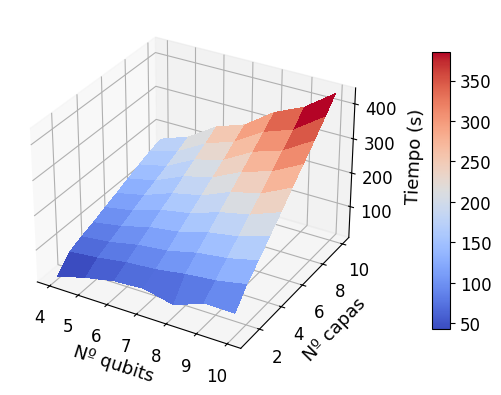

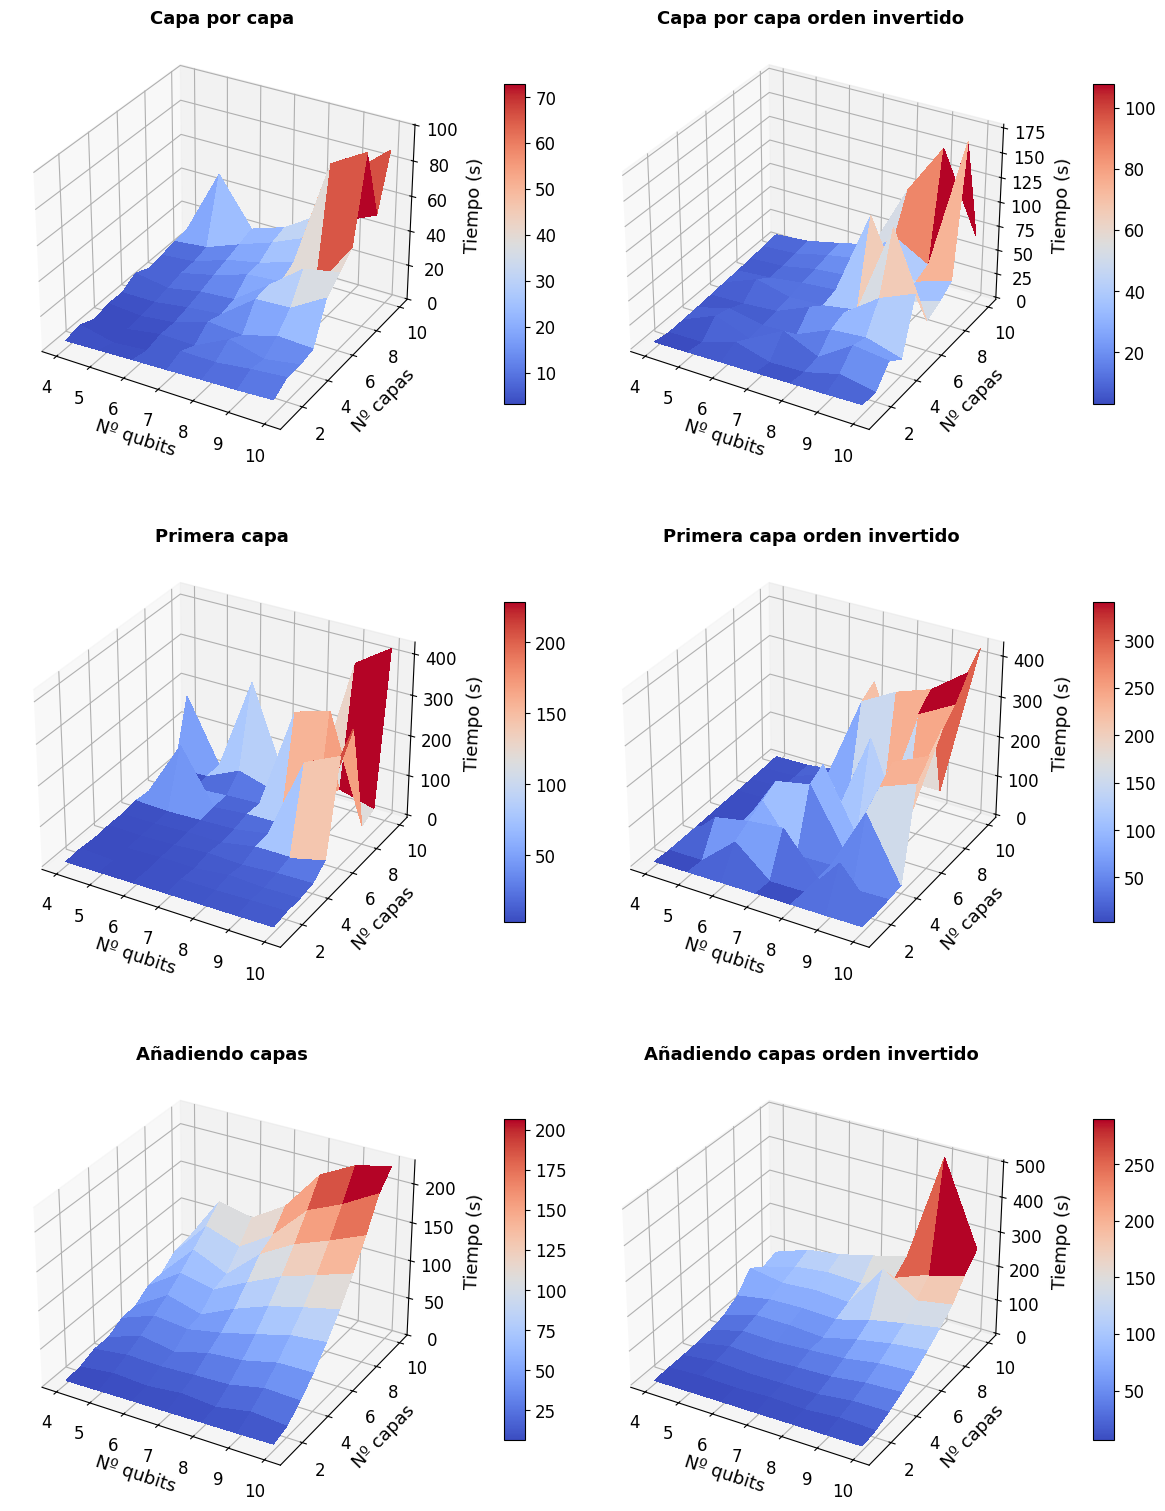

In [85]:
X_vals = range(4, 11)
Y_vals = range(1, 11)
X, Y = np.meshgrid(X_vals, Y_vals)

fig = plt.figure()
Z = np.zeros((len(Y_vals), len(X_vals)))
for i in range(len(X_vals)):
    for j in range(len(Y_vals)):
        Z[j,i] = res_var_qubit_layer_normal[i]["times"][j]
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set_title(f"Normal")
ax.set_xlabel("Nº qubits", fontsize=13)
ax.set_ylabel("Nº capas", fontsize=13)
ax.set_zlabel("Tiempo (s)", fontsize=13,  labelpad=7)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)
cbar=fig.colorbar(surf, ax=ax, shrink=0.75, aspect=15, pad=0.12)
cbar.ax.tick_params(labelsize=12)

fig = plt.figure(figsize=(12, 16))
for k in range(len(res_var_qubit_layer)):
    Z = np.zeros((len(Y_vals), len(X_vals)))
    for i in range(len(X_vals)):
        for j in range(len(Y_vals)):
            Z[j,i] = res_var_qubit_layer[k][i]["times"][j]
    ax = fig.add_subplot(3, 2, k + 1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    #ax.set_zlim(0, 80)
    ax.set_title(f"{titles[k]}", fontsize=13, fontweight="bold")
    ax.set_xlabel("Nº qubits", fontsize=13)
    ax.set_ylabel("Nº capas", fontsize=13)
    ax.set_zlabel("Tiempo (s)", fontsize=13,  labelpad=7)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='z', labelsize=12)
    cbar=fig.colorbar(surf, ax=ax, shrink=0.6, aspect=15, pad=0.12)
    cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

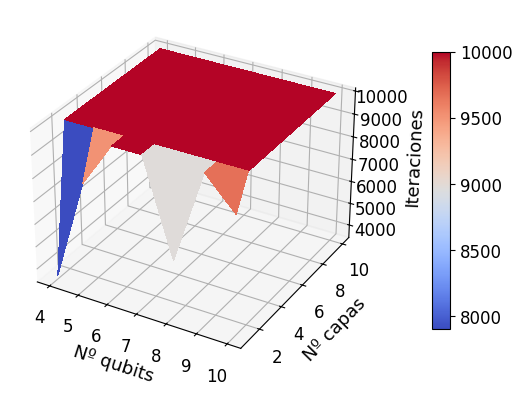

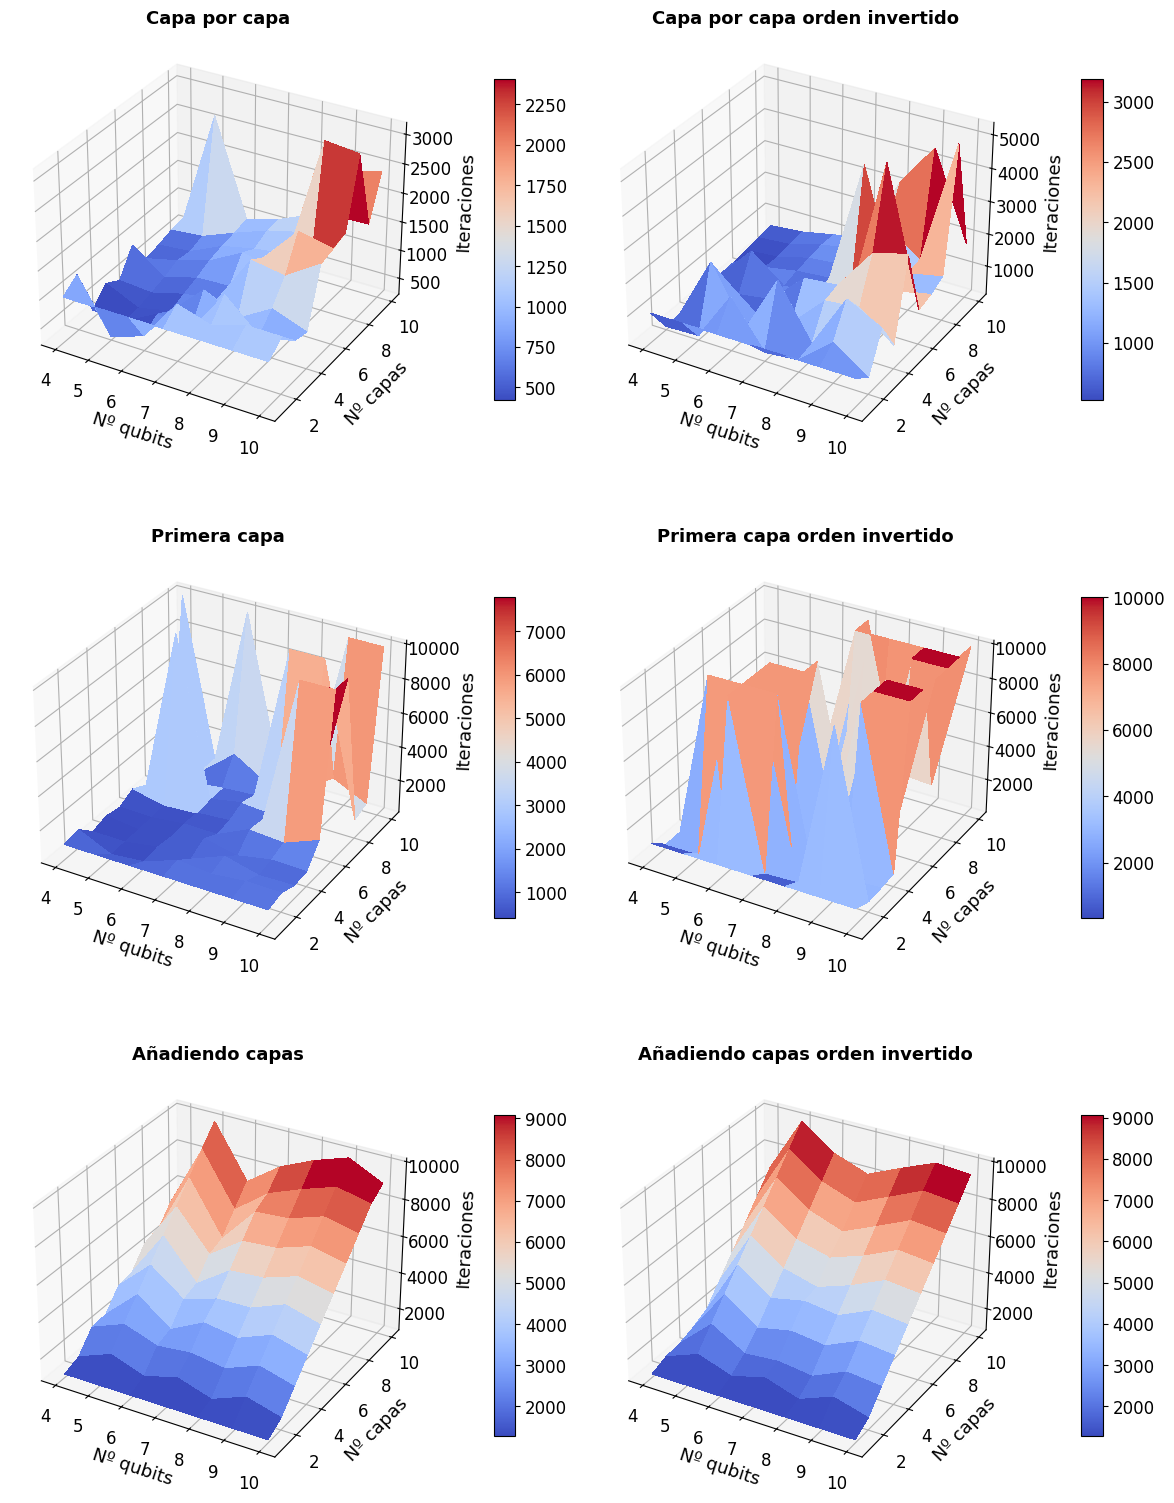

In [86]:
X_vals = range(4, 11)
Y_vals = range(1, 11)
X, Y = np.meshgrid(X_vals, Y_vals)

fig = plt.figure()
Z = np.zeros((len(Y_vals), len(X_vals)))
for i in range(len(X_vals)):
    for j in range(len(Y_vals)):
        Z[j,i] = res_var_qubit_layer_normal[i]["iters"][j]
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set_title(f"Normal")
ax.set_xlabel("Nº qubits", fontsize=13)
ax.set_ylabel("Nº capas", fontsize=13)
ax.set_zlabel("Iteraciones", fontsize=13,  labelpad=7)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)
cbar=fig.colorbar(surf, ax=ax, shrink=0.75, aspect=15, pad=0.12)
cbar.ax.tick_params(labelsize=12)

fig = plt.figure(figsize=(12, 16))
for k in range(len(res_var_qubit_layer)):
    Z = np.zeros((len(Y_vals), len(X_vals)))
    for i in range(len(X_vals)):
        for j in range(len(Y_vals)):
            Z[j,i] = res_var_qubit_layer[k][i]["iters"][j]
    ax = fig.add_subplot(3, 2, k + 1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    #ax.set_zlim(0, 80)
    ax.set_title(f"{titles[k]}", fontsize=13, fontweight="bold")
    ax.set_xlabel("Nº qubits", fontsize=13)
    ax.set_ylabel("Nº capas", fontsize=13)
    ax.set_zlabel("Iteraciones", fontsize=13,  labelpad=7)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='z', labelsize=12)
    cbar=fig.colorbar(surf, ax=ax, shrink=0.6, aspect=15, pad=0.12)
    cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

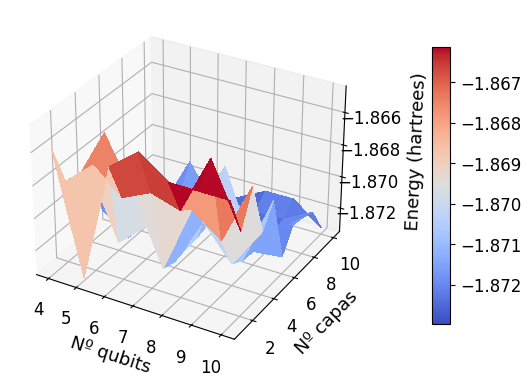

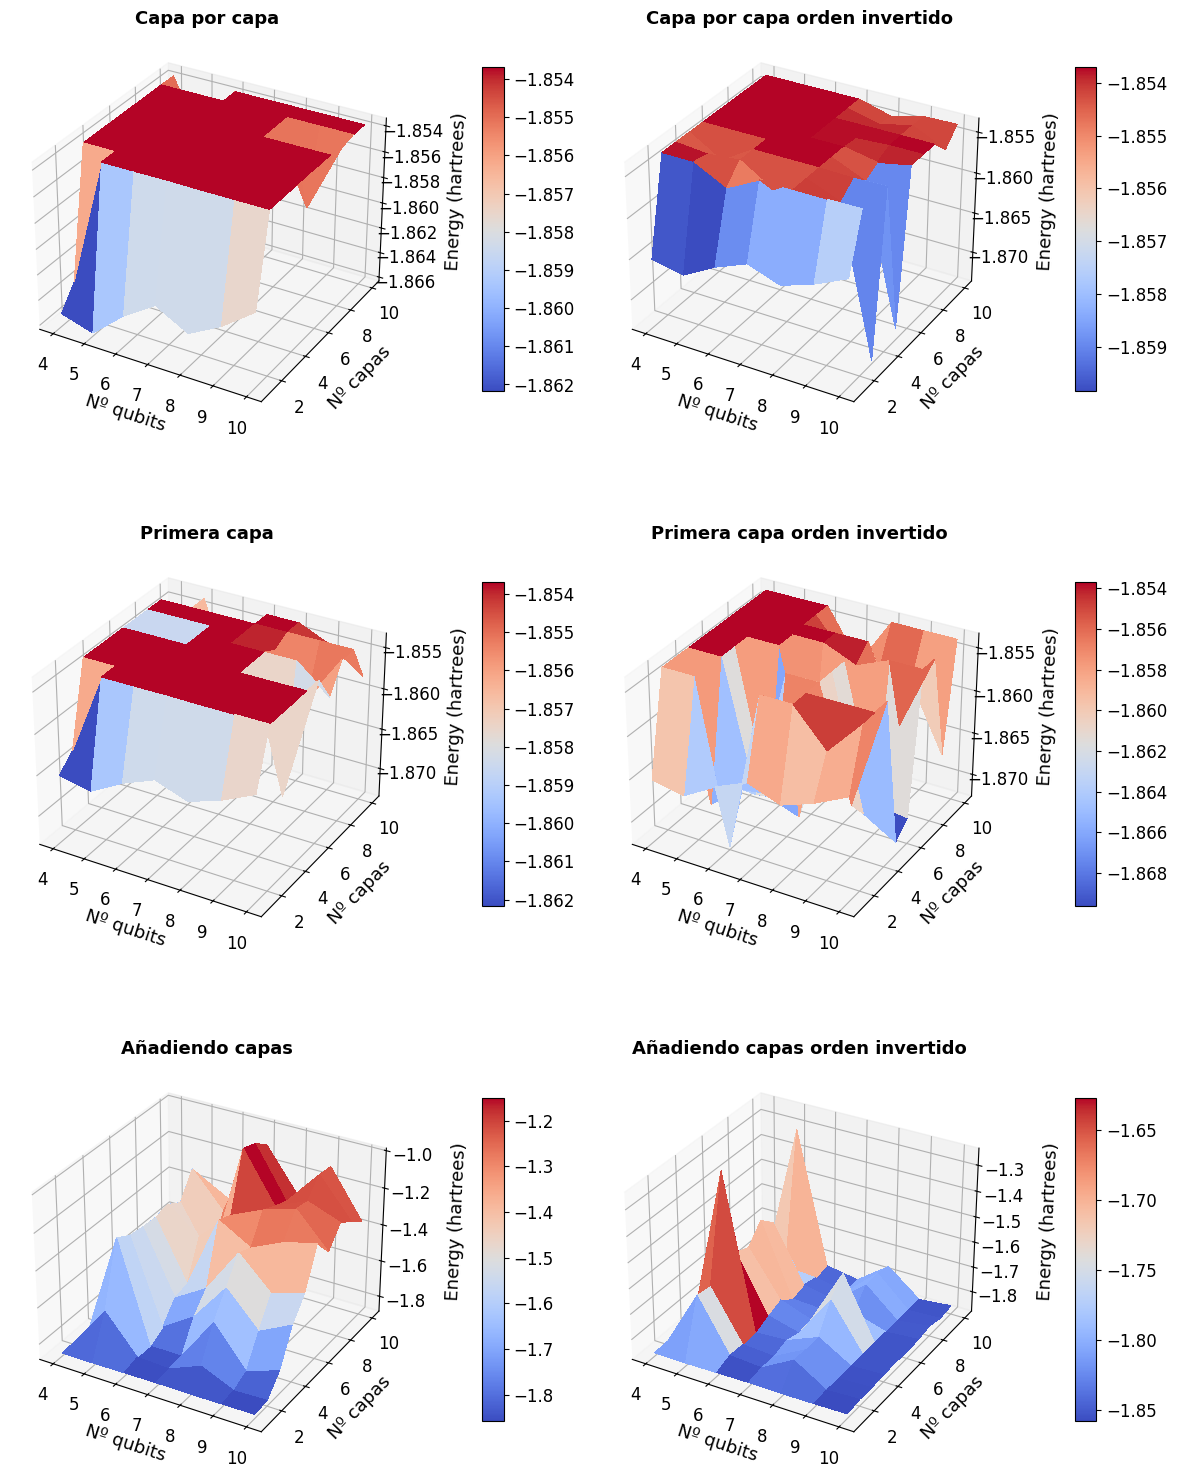

In [87]:
X_vals = range(4, 11)
Y_vals = range(1, 11)
X, Y = np.meshgrid(X_vals, Y_vals)

fig = plt.figure()
Z = np.zeros((len(Y_vals), len(X_vals)))
for i in range(len(X_vals)):
    for j in range(len(Y_vals)):
        Z[j,i] = res_var_qubit_layer_normal[i]["energies"][j]
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set_title(f"Normal")
ax.set_xlabel("Nº qubits", fontsize=13)
ax.set_ylabel("Nº capas", fontsize=13)
ax.set_zlabel("Energy (hartrees)", fontsize=13,  labelpad=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)
cbar=fig.colorbar(surf, ax=ax, shrink=0.75, aspect=15, pad=0.14)
cbar.ax.tick_params(labelsize=12)

fig = plt.figure(figsize=(12, 16))
for k in range(len(res_var_qubit_layer)):
    Z = np.zeros((len(Y_vals), len(X_vals)))
    for i in range(len(X_vals)):
        for j in range(len(Y_vals)):
            Z[j,i] = res_var_qubit_layer[k][i]["energies"][j]
    ax = fig.add_subplot(3, 2, k + 1, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    #ax.set_zlim(0, 80)
    ax.set_title(f"{titles[k]}", fontsize=13, fontweight="bold")
    ax.set_xlabel("Nº qubits", fontsize=13)
    ax.set_ylabel("Nº capas", fontsize=13)
    ax.set_zlabel("Energy (hartrees)", fontsize=13,  labelpad=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='z', labelsize=12)
    cbar=fig.colorbar(surf, ax=ax, shrink=0.6, aspect=15, pad=0.14)
    cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

C:\Users\Martín\AppData\Local\Temp\ipykernel_1760\2936461363.py:6: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(Rectangle((x, y), width, height, fill=True, color=color, alpha=0.7, edgecolor='black', linewidth=1))


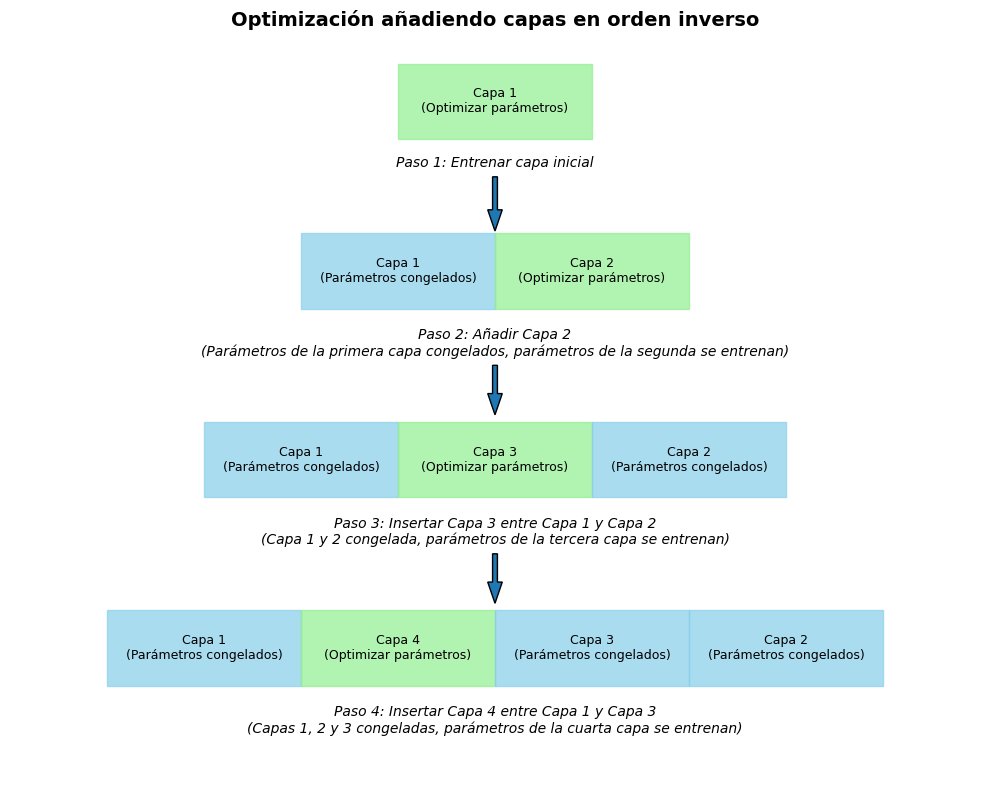

In [142]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow

def draw_layer(ax, x, y, width, height, label, color="skyblue", frozen=False):
    # Dibuja una capa rectangular con bordes más definidos
    ax.add_patch(Rectangle((x, y), width, height, fill=True, color=color, alpha=0.7, edgecolor='black', linewidth=1))
    ax.text(x + width/2, y + height/2, label, ha='center', va='center', fontsize=9)
    if frozen:
        ax.plot([x, x + width], [y + height/2, y + height/2], color='red', linestyle=':', linewidth=2)

fig, ax = plt.subplots(figsize=(10, 8))  # Canvas más alto
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)  # Rango vertical ampliado
ax.axis('off')

# Título
ax.text(5, 8, "Optimización añadiendo capas en orden inverso", ha='center', fontsize=14, weight='bold')

# Paso 1: 1 capa
draw_layer(ax, 4, 6.8, 2, 0.8, "Capa 1\n(Optimizar parámetros)", color="lightgreen")
ax.text(5, 6.5, "Paso 1: Entrenar capa inicial", ha='center', fontsize=10, style='italic')  # Texto más abajo
ax.add_patch(FancyArrow(5, 6.4, 0, -0.35, width=0.05))

# Paso 2: 2 capas
draw_layer(ax, 3, 5, 2, 0.8, "Capa 1\n(Parámetros congelados)")
draw_layer(ax, 5, 5, 2, 0.8, "Capa 2\n(Optimizar parámetros)", color="lightgreen")
ax.text(5, 4.5, "Paso 2: Añadir Capa 2\n(Parámetros de la primera capa congelados, parámetros de la segunda se entrenan)", ha='center', fontsize=10, style='italic')  # 2 líneas
ax.add_patch(FancyArrow(5, 4.4, 0, -0.3, width=0.05))

# Paso 3: 3 capas
draw_layer(ax, 2, 3, 2, 0.8, "Capa 1\n(Parámetros congelados)")
draw_layer(ax, 4, 3, 2, 0.8, "Capa 3\n(Optimizar parámetros)", color="lightgreen")
draw_layer(ax, 6, 3, 2, 0.8, "Capa 2\n(Parámetros congelados)")
ax.text(5, 2.5, "Paso 3: Insertar Capa 3 entre Capa 1 y Capa 2\n(Capa 1 y 2 congelada, parámetros de la tercera capa se entrenan)", ha='center', fontsize=10, style='italic')
ax.add_patch(FancyArrow(5, 2.4, 0, -0.3, width=0.05))

# Paso 4: 4 capas
draw_layer(ax, 1, 1, 2, 0.8, "Capa 1\n(Parámetros congelados)")
draw_layer(ax, 3, 1, 2, 0.8, "Capa 4\n(Optimizar parámetros)", color="lightgreen")
draw_layer(ax, 5, 1, 2, 0.8, "Capa 3\n(Parámetros congelados)")
draw_layer(ax, 7, 1, 2, 0.8, "Capa 2\n(Parámetros congelados)")
ax.text(5, 0.5, "Paso 4: Insertar Capa 4 entre Capa 1 y Capa 3\n(Capas 1, 2 y 3 congeladas, parámetros de la cuarta capa se entrenan)", ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.savefig("esquema_optimizacion_inversa_espaciado.png", dpi=300, bbox_inches='tight')
plt.show()